In [141]:
import sys
import os
import importlib
import pandas as pd

sys.path.append('../shared')

if 'nlp_methods' in sys.modules:
    importlib.reload(sys.modules['nlp_methods'])

from nlp_methods import NLPMethods

## Task 1.2: Text Preprocessing
- Load and combine your text(s) into a single corpus
- Remove Project Gutenberg headers and footers from each text

In [142]:
nlp_methods = NLPMethods("https://www.gutenberg.org/cache/epub/2500/pg2500.txt")

clean_corpus = nlp_methods.remove_gutenberg_header()

## Task 1.3: Regex Pattern Analysis

### Dialogue extraction
- Count total dialogue instances
- Extract the longest piece of dialogue and count its length

### Chapters
- Find all chapter names in each book and store them in a data frame


In [143]:
# Print count of total dialogue instances
# Extract the longest piece of dialogue and count its length and print it
corpus_data = nlp_methods.get_processed_text(clean_corpus)

print("_" * 70)

chapters = nlp_methods.get_chapters(clean_corpus)
chapters_df = pd.DataFrame(chapters, columns=['Chapter'])
chapters_df = chapters_df.set_axis(range(1, len(chapters_df) + 1))
chapters_df

Number of quotes found: 372
Longest dialogue instance (2204 characters):
"Listen well, my dear, listen well! The sinner, which I am and which
you are, is a sinner, but in times to come he will be Brahma again, he
will reach the Nirvana, will be Buddha—and now see: these ‘times to
come’ are a deception, are only a parable! The sinner is not on his way
to become a Buddha, he is not in the process of developing, though our
capacity for thinking does not know how else to picture these things.
No, within the sinner is now and today already the future Buddha, his
future is already all there, you have to worship in him, in you, in
everyone the Buddha which is coming into being, the possible, the
hidden Buddha. The world, my friend Govinda, is not imperfect, or on a
slow path towards perfection: no, it is perfect in every moment, all
sin already carries the divine forgiveness in itself, all small
children already have the old person in themselves, all infants already
have death, all dying peop

,Chapter
1,THE SON OF THE BRAHMAN
2,WITH THE SAMANAS
3,GOTAMA
4,AWAKENING
5,KAMALA
6,WITH THE CHILDLIKE PEOPLE
7,SANSARA
8,BY THE RIVER
9,THE FERRYMAN
10,THE SON


## (Optional, if you want to take it further): Analyze dialogue vs. narrative ratio

/var/folders/02/c1hvrmj11kx0z457p84l6pbc0000gn/T/ipykernel_48175/1780572433.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=plot_data, y='Content_Type', x='Percentage', orient='h',


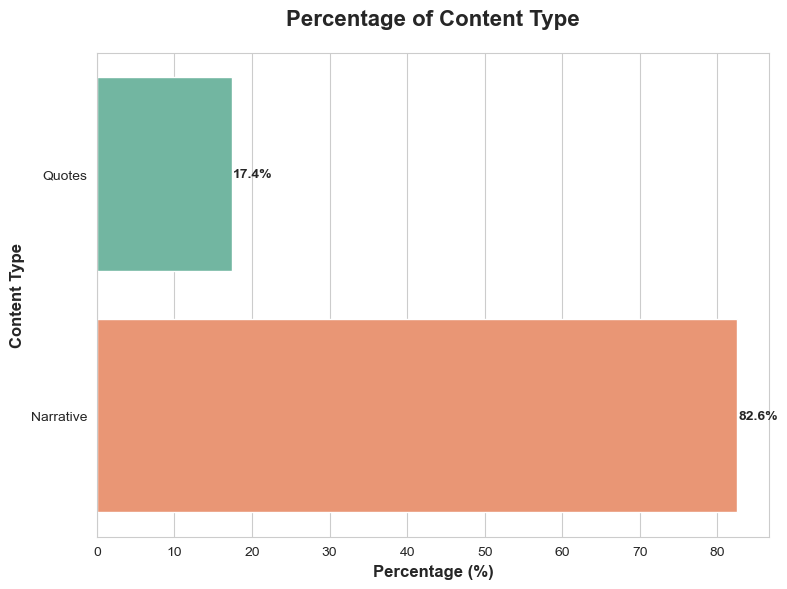

In [144]:
# Plot quotes vs narrative comparison using seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Extract quote vs narrative data from corpus_data
quotes = len(corpus_data['quotes'])
non_quote_sentences = len(corpus_data['non_quote_sentences'])
quote_tokens = len(corpus_data['quote_tokens'])
non_quote_tokens = len(corpus_data['non_quote_tokens'])

# Calculate percentages
quote_percentage = (quotes / (quotes + non_quote_sentences)) * 100
narrative_percentage = (non_quote_sentences / (quotes + non_quote_sentences)) * 100

# Prepare data for seaborn
plot_data = pd.DataFrame({
    'Content_Type': ['Quotes', 'Narrative'],
    'Percentage': [quote_percentage, narrative_percentage]
})

# Create seaborn plot
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# Create horizontal bar plot with custom colors
ax = sns.barplot(data=plot_data, y='Content_Type', x='Percentage', orient='h', 
                 palette="Set2")

# Customize the plot
ax.set_title('Percentage of Content Type', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Percentage (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Content Type', fontsize=12, fontweight='bold')

# Add value labels on bars
for i, (bar, pct) in enumerate(zip(ax.patches, [quote_percentage, narrative_percentage])):
    ax.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
            f'{pct:.1f}%', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

**AI Citation:**
AI assistance: Claude (Anthropic) via Cursor IDE
Prompts: "Convert this to a seaborn plot.".

**Used for:**
- Converting matplotlib plot to seaborn plot

**Verification:** Verified graph matched printed stats

## Task 1.4: Statistical Sampling

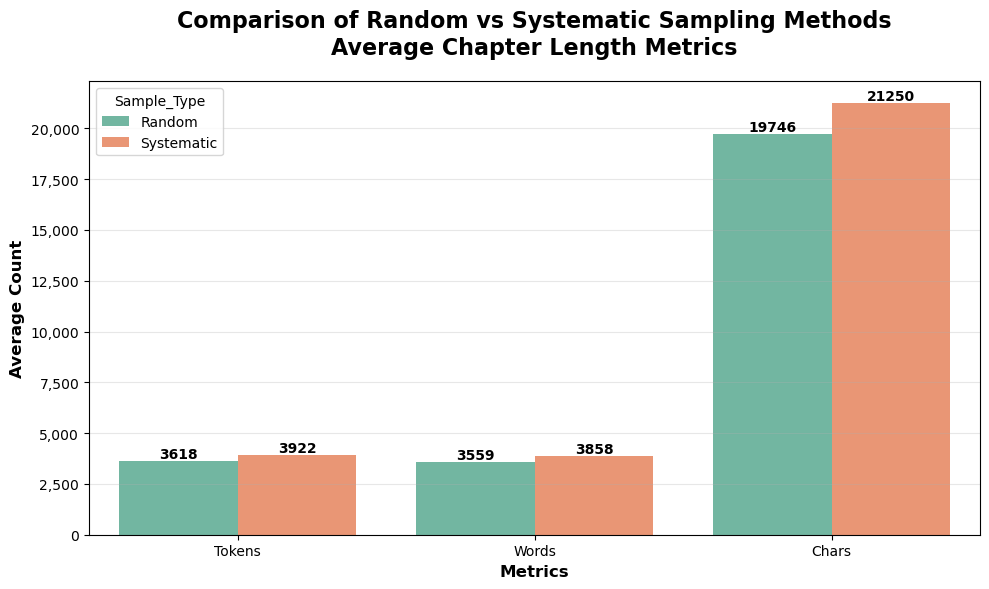

In [145]:
random_sample = nlp_methods.get_random_sample_chapter_data(chapters, clean_corpus)
systematic_sample = nlp_methods.get_systematic_sample_chapter_data(chapters, clean_corpus)
comparison_data = nlp_methods.compare_sample_lengths(random_sample, systematic_sample)

plot_data = []

metrics = ['tokens', 'words', 'chars']
for metric in metrics:
    avg_key = f'avg_{metric}'
    plot_data.append({
        'Metric': metric.title(),
        'Sample_Type': 'Random',
        'Average': comparison_data['random_sample'][avg_key]
    })
    plot_data.append({
        'Metric': metric.title(),
        'Sample_Type': 'Systematic', 
        'Average': comparison_data['systematic_sample'][avg_key]
    })

df_plot = pd.DataFrame(plot_data)

plt.style.use('default')
sns.set_palette("Set2")

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(data=df_plot, x='Metric', y='Average', hue='Sample_Type', ax=ax)

ax.set_title('Comparison of Random vs Systematic Sampling Methods\nAverage Chapter Length Metrics', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Count', fontsize=12, fontweight='bold')

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=10, fontweight='bold')

ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## Task 2.2: PDF Processing and OCR
- Apply OCR to extract text from each page 
- Remove headers and page numbers
- Remove footers, footnotes, and any artifacts
- Preserve the logical structure
- Handle multi-column format

In [146]:
doc = pymupdf.open("./OCR_me_electricalengineering.pdf")
page = doc.load_page(0)

# Get page dimensions
page_rect = page.rect
page_height = page_rect.height
page_width = page_rect.width

# Define margins to exclude header/footer (adjust these values as needed)
top_margin = 100    # Skip top 100 to remove header
bottom_margin = 50 # Skip bottom 50 - verified content at bottom of page preserved
left_margin = 20   # Optional: skip left margin
right_margin = 20  # Optional: skip right margin

# Create a rectangle for the main content area
content_rect = pymupdf.Rect(
    left_margin, 
    top_margin,
    page_width - right_margin,
    page_height - bottom_margin
)

# Extract text only from the content area
text = page.get_text(clip=content_rect)

# Save the text to a file
with open("OCR_me_electricalengineering_processed.txt", "w", encoding="utf-8") as f:
    f.write(text)

print("Text saved to OCR_me_electricalengineering_processed.txt")
print("\nExtracted text:")
print(text)

Text saved to OCR_me_electricalengineering_processed.txt

Extracted text:
ELECTRICAL ENGINEERING
http://www.uvm.edu/~cems/soe/
OVERVIEW
The Electrical Engineering (EE) program at the University of
Vermont is at the forefront of research in the areas of digital
signal processing, control systems, power and energy systems,
wireless communications, and electronic circuit and system
design and testing. This rigorous and focused program offers
competitive funding and prepares graduate students for careers
in research and technical leadership. Graduate students can
contribute to interdisciplinary research within a broad range of
applications, including power/energy, biomedical, aerospace, and
transportation. In addition, the EE program partners with other
academic units to offer M.S. and Ph.D. degrees in Materials Science
and a Ph.D. degree in Biomedical Engineering.
DEGREES
Electrical Engineering AMP
Electrical Engineering M.S.
Electrical Engineering Ph.D.
FACULTY
Almassalkhi, Mads; Associa